This notebook was created exclusively for the course "Raumflugmechanik"
(Spaceflight Dynamics) at FH Aachen University of Applied Sciences
by Prof. Dr. Bernd Dachwald on 13 November 2021.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Earth:
    mu = 398600.4  # Gravitational parameter in [km^3/s^2]
    R = 6378.14  # Radius in [km]
    J2 = 0.00108263  # J2

In [8]:
e = Earth()  # Create Earth object

# Inclination for a sun-synchronous circular orbit

The required rotation of the nodal line is $\dot\Omega = \frac{360^\circ}{365.25\,\text{days}} = \frac{2\pi}{365.25\cdot 86400 \,\text{s}} = 1.991 \times 10^{-7} \,\mathrm{rad/s}$

In [9]:
dOmegaSSO = 2 * np.pi / (365.25 * 86400)
print("Sun-synchronous rotation of the nodal line = %e rad/s = %f deg/day" %(dOmegaSSO, np.rad2deg(dOmegaSSO) * 86400))

Sun-synchronous rotation of the nodal line = 1.991021e-07 rad/s = 0.985626 deg/day


\begin{equation*}
    1.991021 \times 10^{-7} \,\mathrm{rad/s} = -\frac{3nJ_2R^2}{2a^2}\cos i
    \quad\Leftrightarrow\quad
    i = \cos^{-1}\left(-\frac{2a^2}{3nJ_2R^2}\cdot 1.991021 \times 10^{-7} \,\mathrm{rad/s}\right)
\end{equation*}
with the mean motion
\begin{equation*}
n = \sqrt{\frac{\mu}{a^3}}
\end{equation*}

In [10]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

In [11]:
h = np.arange(400, 1200, 1)  # Range of altitudes in [km]
n = (e.mu / (e.R + h)**3)**0.5  # Mean motion in [rad/s]
iSSO = np.arccos(-2 * (e.R + h)**2 / (3 * n * e.J2 * e.R**2) * dOmegaSSO)  # Sun-synchronous inclination in [rad]

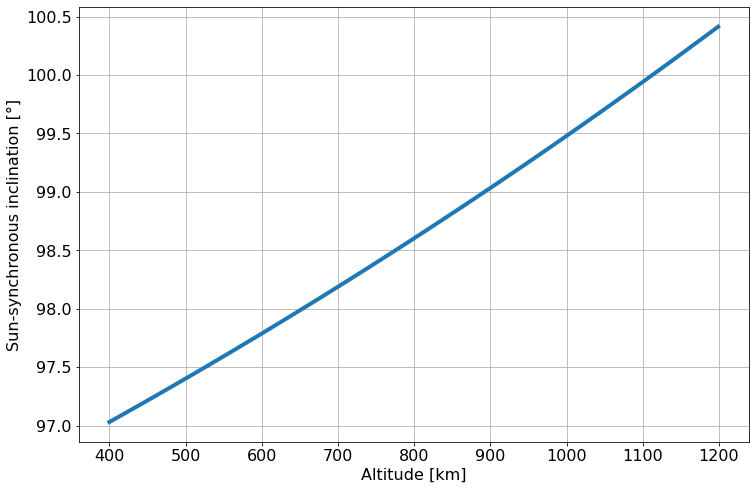

In [12]:
fig, ax = plt.subplots()
ax.plot(h, np.rad2deg(iSSO), linewidth=4.0)
plt.grid()
plt.xlabel("Altitude [km]")
plt.ylabel("Sun-synchronous inclination [°]")
plt.show()